### Data exploration & cleaning

In [69]:
import pandas as pd
import numpy as np

In [70]:
#Importing dataset
data = pd.read_csv(r'C:\Users\matui\Downloads\Final_project_data\League of Legends Champion Stats 12.11.csv', sep=';')

In [71]:
#First look
data

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,God,69.36,3.20,48.94%,92.64%,7.31%,5.43%,1.96
1,Ahri,Mage,MID,God,73.72,-5.74,50.04%,95.11%,9.83%,8.59%,2.63
2,Akali,Assassin,MID,S,58.67,2.63,48.70%,68.12%,6.26%,11.79%,2.39
3,Akali,Assassin,TOP,B,43.83,-0.89,47.58%,30.92%,2.67%,11.79%,2.05
4,Akshan,Marksman,MID,B,46.91,-0.64,49.50%,58.88%,2.93%,7.60%,2.22
...,...,...,...,...,...,...,...,...,...,...,...
236,Ziggs,Mage,ADC,D,35.08,7.31,51.29%,57.15%,1.39%,0.32%,2.54
237,Zilean,Support,MID,A,52.69,-1.77,52.49%,21.28%,1.05%,2.71%,3.57
238,Zilean,Support,SUPPORT,A,49.18,-5.34,49.80%,75.08%,3.65%,2.71%,3.09
239,Zoe,Mage,MID,A,48.25,-0.96,48.23%,91.87%,3.82%,1.73%,2.51


In [72]:
data.info()
#11 cols, 241 rows, apparently no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    241 non-null    object 
 1   Class   241 non-null    object 
 2   Role    241 non-null    object 
 3   Tier    241 non-null    object 
 4   Score   241 non-null    float64
 5   Trend   241 non-null    float64
 6   Win %   241 non-null    object 
 7   Role %  241 non-null    object 
 8   Pick %  241 non-null    object 
 9   Ban %   241 non-null    object 
 10  KDA     241 non-null    float64
dtypes: float64(3), object(8)
memory usage: 20.8+ KB


In [73]:
#Double check missing values
data.isna().sum()

Name      0
Class     0
Role      0
Tier      0
Score     0
Trend     0
Win %     0
Role %    0
Pick %    0
Ban %     0
KDA       0
dtype: int64

In [74]:
#Always a good thing to have columns names
data.columns

Index(['Name', 'Class', 'Role', 'Tier', 'Score', 'Trend', 'Win %', 'Role %',
       'Pick %', 'Ban %', 'KDA'],
      dtype='object')

In [75]:
#I want to see if a given champion can have multiple informations in columns Class or Role
#If it is the case we have to keep only one value
data.Class.value_counts()

Fighter     70
Mage        61
Marksman    33
Tank        30
Assassin    26
Support     21
Name: Class, dtype: int64

In [76]:
#Each row has only one value in those columns
data.Role.value_counts()

TOP        62
MID        61
JUNGLE     48
SUPPORT    42
ADC        28
Name: Role, dtype: int64

In [77]:
#We need to encode Class and Role in order to have numeric data
from sklearn.preprocessing import LabelEncoder
tst = data.copy()
le = LabelEncoder()
data['Class'] = le.fit_transform(data.Class.values)
data['Role'] = le.fit_transform(data.Role.values)

In [78]:
#Results
data

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,1,4,God,69.36,3.20,48.94%,92.64%,7.31%,5.43%,1.96
1,Ahri,2,2,God,73.72,-5.74,50.04%,95.11%,9.83%,8.59%,2.63
2,Akali,0,2,S,58.67,2.63,48.70%,68.12%,6.26%,11.79%,2.39
3,Akali,0,4,B,43.83,-0.89,47.58%,30.92%,2.67%,11.79%,2.05
4,Akshan,3,2,B,46.91,-0.64,49.50%,58.88%,2.93%,7.60%,2.22
...,...,...,...,...,...,...,...,...,...,...,...
236,Ziggs,2,0,D,35.08,7.31,51.29%,57.15%,1.39%,0.32%,2.54
237,Zilean,4,2,A,52.69,-1.77,52.49%,21.28%,1.05%,2.71%,3.57
238,Zilean,4,3,A,49.18,-5.34,49.80%,75.08%,3.65%,2.71%,3.09
239,Zoe,2,2,A,48.25,-0.96,48.23%,91.87%,3.82%,1.73%,2.51


In [79]:
#I'm creating 2 dictionnaries with value before and after encoding just to keep track of what number correspond to what
data_class = {'Fighter':1, 'Mage':2, 'Marksman':3,
              'Tank':5, 'Assassin':0, 'Support':4}

data_role = {'TOP':4, 'MID':2, 'JUNGLE':1,
              'SUPPORT':3, 'ADC':0}

In [80]:
#Converting object column containing number in string to number type
#Delete % sign
col = ['Win %', 'Role %', 'Pick %', 'Ban %']

for i in col:
    data[i]=data[i].str.replace("%","", regex=True)

In [81]:
#Changing dtype
for i in col:
    data[i] = pd.to_numeric(data[i])

In [84]:
#Checking results
data.dtypes

Name       object
Class       int32
Role        int32
Tier       object
Score     float64
Trend     float64
Win %     float64
Role %    float64
Pick %    float64
Ban %     float64
KDA       float64
dtype: object

In [85]:
#Having a look at numeric data
data.describe()

,Class,Role,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.00000,241.000000,241.000000,241.000000
mean,2.178423,2.257261,50.000249,-0.341203,50.054938,62.05444,3.942822,5.580373,2.366722
std,1.518398,1.344820,12.737547,9.161103,2.046839,31.48353,3.579935,6.823018,0.423816
min,0.000000,0.000000,22.550000,-28.040000,41.490000,10.11000,0.150000,0.130000,1.450000
25%,1.000000,1.000000,42.280000,-4.340000,48.790000,28.02000,1.390000,0.880000,2.090000
50%,2.000000,2.000000,48.080000,-0.040000,50.070000,75.95000,2.910000,3.180000,2.340000
75%,3.000000,4.000000,55.200000,3.630000,51.420000,90.88000,5.570000,7.600000,2.610000
max,5.000000,4.000000,94.930000,64.580000,57.130000,99.41000,20.310000,48.200000,4.370000


### EDA

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

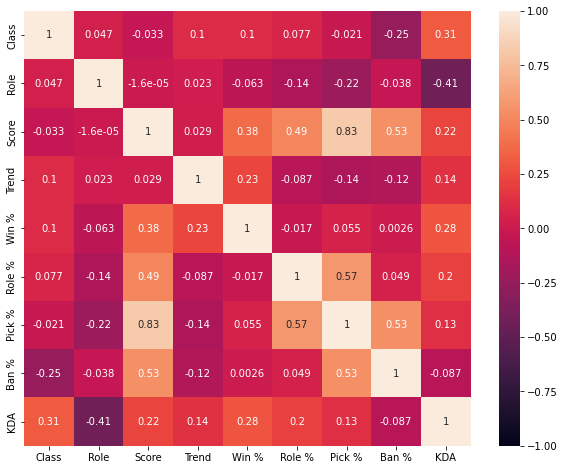

In [87]:
#Now we need to print the correlation matrix to see if some columns brings the same information
#In that case we need to drop one of those because it is not relevant for ML
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

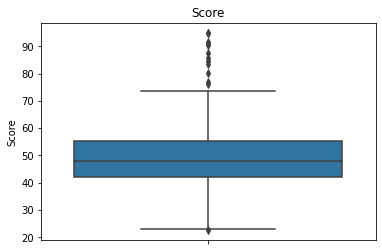

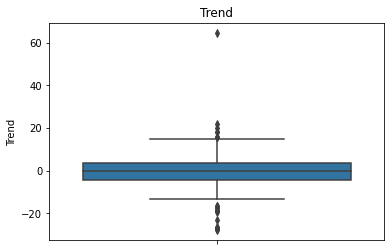

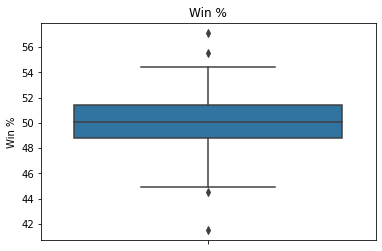

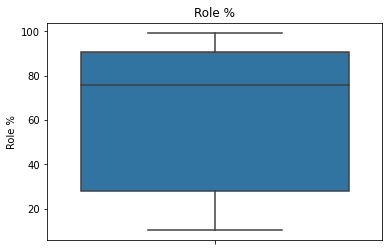

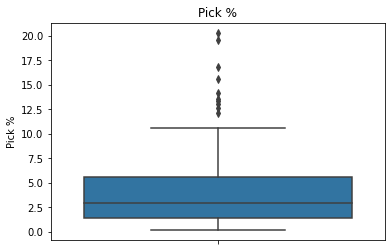

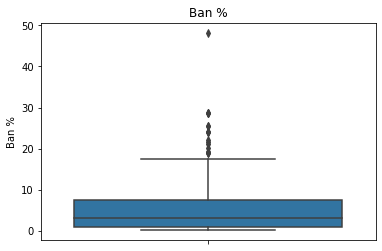

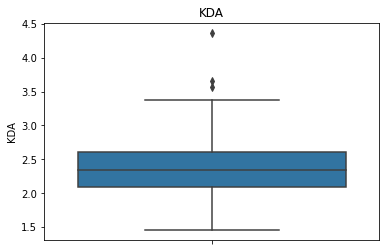

In [90]:
#Keeping only numeric data that make sense plotting (delete encoded columns from list)
col_plot = ['Score', 'Trend', 'Win %', 'Role %',
       'Pick %', 'Ban %', 'KDA']

for i in col:
    sns.boxplot(data = data, y=i)
    plt.title(i)
    plt.show()

In [92]:
#Quantity of outliers
for x in col_plot:
    Q3 = data[x].quantile(0.75)
    Q1= data[x].quantile(0.25)
    IQR = Q3 - Q1
    filters = data[data[x]>Q3 + 1.5*IQR]
    print('Column', x)
    print('Number of outliers', len(filters))
    print('Percentage of outliers', "{:.1f}".format((len(filters)/len(data[x]))*100))
    print('\n')

#I think here outlier values are from champion that performs better or worst than the average

Column Score
Number of outliers 12
Percentage of outliers 5.0


Column Trend
Number of outliers 7
Percentage of outliers 2.9


Column Win %
Number of outliers 2
Percentage of outliers 0.8


Column Role %
Number of outliers 0
Percentage of outliers 0.0


Column Pick %
Number of outliers 10
Percentage of outliers 4.1


Column Ban %
Number of outliers 17
Percentage of outliers 7.1


Column KDA
Number of outliers 3
Percentage of outliers 1.2




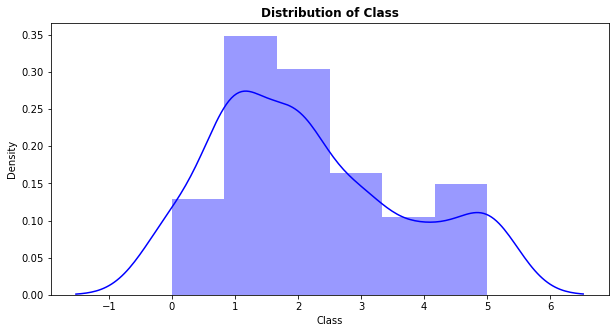

In [110]:
#Plotting distribution of Class
f, axes = plt.subplots(figsize=(10, 5), sharex=True)
plt.title('Distribution of Class', fontweight='bold')
sns.distplot(data['Class'],hist=True, color='blue', bins=6)
plt.xlabel('Class')
plt.show()

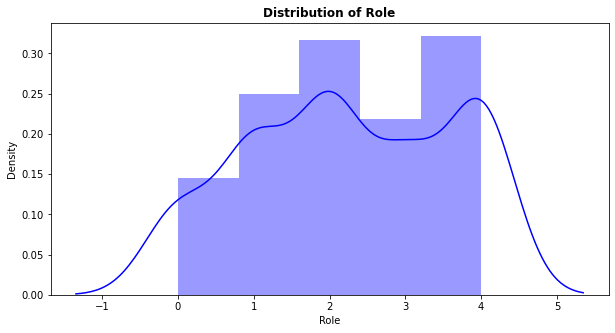

In [109]:
#Plotting distribution of Role
f, axes = plt.subplots(figsize=(10, 5), sharex=True)
plt.title('Distribution of Role', fontweight='bold')
sns.distplot(data['Role'],hist=True, color='blue', bins=5)
plt.xlabel('Role')
plt.show()

In [104]:
#The data should be cleaned by now
data.to_csv(r'C:\Users\matui\Downloads\data_12-11_cleaned.csv')

### Model building

In [111]:
#Importing models librairies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import CategoricalNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn import set_config
set_config(display="diagram")
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

In [112]:
#Making a copy of clean data for ML
data1 = data

In [113]:
data1

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,1,4,God,69.36,3.20,48.94,92.64,7.31,5.43,1.96
1,Ahri,2,2,God,73.72,-5.74,50.04,95.11,9.83,8.59,2.63
2,Akali,0,2,S,58.67,2.63,48.70,68.12,6.26,11.79,2.39
3,Akali,0,4,B,43.83,-0.89,47.58,30.92,2.67,11.79,2.05
4,Akshan,3,2,B,46.91,-0.64,49.50,58.88,2.93,7.60,2.22
...,...,...,...,...,...,...,...,...,...,...,...
236,Ziggs,2,0,D,35.08,7.31,51.29,57.15,1.39,0.32,2.54
237,Zilean,4,2,A,52.69,-1.77,52.49,21.28,1.05,2.71,3.57
238,Zilean,4,3,A,49.18,-5.34,49.80,75.08,3.65,2.71,3.09
239,Zoe,2,2,A,48.25,-0.96,48.23,91.87,3.82,1.73,2.51


In [114]:
#Drop Name column because it is 241 different values
data1 = data1.drop('Name', axis=1)

In [115]:
# Partition data
X = data1.drop('Tier', axis=1)
y = data1['Tier']
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#### Hyperparamter tuning

In [116]:
#Create dictionnary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"classifier": [RidgeClassifier()],
                 "classifier__alpha": [.0001, 0.001,0.01, 0.01,1],          
                 "classifier__fit_intercept": [True,False],
                 "classifier__normalize": [True,False],
                 "classifier__solver": ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
                }, 
    
                {"classifier": [SVC()],
                 "classifier__C": [0.1, 1, 10, 100, 1000],
                 "classifier__degree" : [0, 1, 2, 3, 4, 5, 6]
                },
    
                {"classifier": [CategoricalNB()],
                 "classifier__alpha": [1, 0],
                },
    
                {"classifier": [ExtraTreesClassifier()],
                 "classifier__n_estimators": [10, 20, 50, 100],
                 "classifier__max_depth": [5, 8, 15, 25, 30, None],
                 "classifier__min_samples_leaf": [1, 2, 5, 10, 15, 100]
                },
    
                {"classifier": [GradientBoostingClassifier()],
                 "classifier__loss": ['log_loss', 'deviance', 'exponential'],
                 "classifier__n_estimators": [10, 20, 50, 100],
                 "classifier__max_depth": [5, 8, 15, 25, 30, None],
                 "classifier__min_samples_leaf": [1, 2, 5, 10, 15, 100]
                },
    
                {"classifier": [LinearDiscriminantAnalysis()],
                 "classifier__solver": ['svd', 'lsqr', 'eigen'],
                 "classifier__shrinkage": [None, 'auto', 0, 0.2, 0.4, 0.6, 0.8, 1]
                },
    
                {"classifier": [LinearSVC()],
                 "classifier__penalty": ['l1', 'l2'],
                 "classifier__loss": ['hing', 'squared_hinge'],
                 "classifier__C": [0.1, 1, 10, 100, 1000]
                },
    
                {"classifier": [KNeighborsClassifier()],
                 "classifier__n_neighbors": [1, 2, 5, 10, 15, 20],
                 "classifier__metric": ['euclidean', 'manhattan', 'minkowski'],
                 "classifier__weights": ['uniform', 'distance']
                }]

In [117]:
#Create pipeline for each classifier
pipe = Pipeline([("classifier", RidgeClassifier())])

#Create a gridsearch of the pipeline
gridsearch = GridSearchCV(pipe, grid_param[0], cv=5, verbose=0, n_jobs=-1)
best_model = gridsearch.fit(X_train, y_train)

print(best_model.best_estimator_)
print('The mean accuracy of the model is:', best_model.score(X_test, y_test))

Pipeline(steps=[('classifier',
                 RidgeClassifier(alpha=0.0001, normalize=False,
                                 solver='lsqr'))])
The mean accuracy of the model is: 0.42857142857142855


In [118]:
#Create pipeline for each classifier
pipe1 = Pipeline([("classifier", SVC())])

#Create a gridsearch of the pipeline
gridsearch = GridSearchCV(pipe1, grid_param[1], cv=5, verbose=0, n_jobs=-1)
best_model = gridsearch.fit(X_train, y_train)

print(best_model.best_estimator_)
print('The mean accuracy of the model is:', best_model.score(X_test, y_test))

Pipeline(steps=[('classifier', SVC(C=1000, degree=0))])
The mean accuracy of the model is: 0.8571428571428571


In [120]:
#Create pipeline for each classifier
pipe3 = Pipeline([("classifier", ExtraTreesClassifier())])

#Create a gridsearch of the pipeline
gridsearch = GridSearchCV(pipe3, grid_param[3], cv=5, verbose=0, n_jobs=-1)
best_model = gridsearch.fit(X_train, y_train)

print(best_model.best_estimator_)
print('The mean accuracy of the model is:', best_model.score(X_test, y_test))

Pipeline(steps=[('classifier',
                 ExtraTreesClassifier(max_depth=8, n_estimators=50))])
The mean accuracy of the model is: 0.8979591836734694


In [121]:
#Create pipeline for each classifier
pipe4 = Pipeline([("classifier", GradientBoostingClassifier())])

#Create a gridsearch of the pipeline
gridsearch = GridSearchCV(pipe4, grid_param[4], cv=5, verbose=0, n_jobs=-1)
best_model = gridsearch.fit(X_train, y_train)

print(best_model.best_estimator_)
print('The mean accuracy of the model is:', best_model.score(X_test, y_test))

Pipeline(steps=[('classifier',
                 GradientBoostingClassifier(max_depth=5, n_estimators=10))])
The mean accuracy of the model is: 0.9591836734693877


In [122]:
#Create pipeline for each classifier
pipe5 = Pipeline([("classifier", LinearDiscriminantAnalysis())])

#Create a gridsearch of the pipeline
gridsearch = GridSearchCV(pipe5, grid_param[5], cv=5, verbose=0, n_jobs=-1)
best_model = gridsearch.fit(X_train, y_train)

print(best_model.best_estimator_)
print('The mean accuracy of the model is:', best_model.score(X_test, y_test))

Pipeline(steps=[('classifier',
                 LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr'))])
The mean accuracy of the model is: 0.8979591836734694


In [123]:
#Create pipeline for each classifier
pipe6 = Pipeline([("classifier", LinearSVC())])

#Create a gridsearch of the pipeline
gridsearch = GridSearchCV(pipe6, grid_param[6], cv=5, verbose=0, n_jobs=-1)
best_model = gridsearch.fit(X_train, y_train)

print(best_model.best_estimator_)
print('The mean accuracy of the model is:', best_model.score(X_test, y_test))

Pipeline(steps=[('classifier', LinearSVC(C=0.1))])
The mean accuracy of the model is: 0.4489795918367347


In [124]:
#Create pipeline for each classifier
pipe7 = Pipeline([("classifier", KNeighborsClassifier())])

#Create a gridsearch of the pipeline
gridsearch = GridSearchCV(pipe7, grid_param[7], cv=5, verbose=0, n_jobs=-1)
best_model = gridsearch.fit(X_train, y_train)

print(best_model.best_estimator_)
print('The mean accuracy of the model is:', best_model.score(X_test, y_test))

Pipeline(steps=[('classifier',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=15,
                                      weights='distance'))])
The mean accuracy of the model is: 0.6530612244897959


#### Building pipelines

In [125]:
#Pipeline building with hyperparameters defined before

pipeline_rid = Pipeline([('rid_scaler', MinMaxScaler()),
                         ('rid_pca', PCA(n_components=3)),
                         ('rid_classifier', RidgeClassifier(alpha=0.0001, normalize=True))])

In [126]:
pipeline_svc = Pipeline([('svc_scaler', MinMaxScaler()),
                         ('svc_pca', PCA(n_components=3)),
                         ('svc_classifier', SVC(C=0.1, degree=0))])

In [127]:
pipeline_cat = Pipeline([('cat_scaler', MinMaxScaler()),
                         ('cat_pca', PCA(n_components=3)),
                         ('cat_classifier', CategoricalNB(alpha=1))])

In [128]:
pipeline_ext = Pipeline([('ext_scaler', MinMaxScaler()),
                         ('ext_pca', PCA(n_components=3)),
                         ('ext_classifier', ExtraTreesClassifier(max_depth=30, min_samples_leaf=2, n_estimators=50))])

In [129]:
pipeline_gra = Pipeline([('gra_scaler', MinMaxScaler()),
                         ('gra_pca', PCA(n_components=3)),
                         ('gra_classifier', GradientBoostingClassifier(max_depth=15, min_samples_leaf=100, n_estimators=20))])

In [130]:
pipeline_dis = Pipeline([('dis_scaler', MinMaxScaler()),
                         ('dis_pca', PCA(n_components=3)),
                         ('dis_classifier', LinearDiscriminantAnalysis(shrinkage=0.2, solver='lsqr'))])

In [131]:
pipeline_linsvc = Pipeline([('linsvc_scaler', MinMaxScaler()),
                            ('linsvc_pca', PCA(n_components=3)),
                            ('linsvc_classifier', LinearSVC(C=100))])

In [132]:
pipeline_knn = Pipeline([('knn_scaler', MinMaxScaler()),
                         ('knn_pca', PCA(n_components=3)),
                         ('knn_classifier', KNeighborsClassifier(metric='euclidean', n_neighbors=20, weights='distance'))])

In [134]:
#Pipelines list
pipelines = [pipeline_rid, pipeline_svc, pipeline_cat, pipeline_ext, pipeline_gra, pipeline_dis, pipeline_linsvc, pipeline_knn]

In [135]:
#Comparator for later use
best_accuracy = 0.0
best_classifier = 0
best_pipeline = ""

In [142]:
#Dictionnary of pipelines
pipe_dict = {0:'Ridge', 1:'SVC', 2:'Extra Trees',
             3:'Gradient Boosting', 4:'Linear Discriminant', 5:'Linear SVC', 7:'KNN'}

In [143]:
#Fit pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [144]:
#Printing models accuracy
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i], model.score(X_test, y_test)))

Ridge Test Accuracy: 0.2857142857142857
SVC Test Accuracy: 0.2653061224489796


IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
#Finding out best model
for i,model in enumerate(pipelines):
    if model.score(X_test, y_test)>best_accuracy:
        best_accuracy = model.score(X_test, y_test)
        best_pipeline = model
        best_classifier = i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

#### Testing best model

In [ ]:
def generate_results(prediction, y_test, model, x_test):
    print('The accuracy of the Tree is', '{:.3f}'.format(metrics.accuracy_score(prediction,y_test)))

    cm = metrics.plot_confusion_matrix(model, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=None)
    cm.ax_.set_title('Tree Confusion matrix, without normalization');

In [ ]:
#Testing best model
model_test = SVC(C=0.1, degree=0)
result_test = model.fit(X_train,y_train)
prediction_test = result_test.predict(X_test)

print(classification_report(y_test,prediction_test))

generate_results(prediction_test,y_test,model,X_test)

In [ ]:
print(metrics.roc_auc_score(y_test, prediction_test))

In [ ]:
# Plotting the ROC curve
metrics.plot_roc_curve(result_test, X_test, y_test)

plt.title('Receiver Operating Characteristic')

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.show()